<a href="https://colab.research.google.com/github/RamziRBM/lab-neural-networks/blob/master/your-code/challenge-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](https://github.com/RamziRBM/lab-neural-networks/blob/master/your-code/tttboard.jpg?raw=1)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
import pandas as pd
import numpy as np


df_file = pd.read_csv("https://github.com/ironhack-labs/lab-neural-networks/raw/refs/heads/master/your-code/tic-tac-toe.csv")

print("=== Training Data Preview ===")
print(df_file.head(), "\n")
print("=== Training Data Info ===")
print(df_file.info(), "\n")
print("=== Summary Statistics ===")
print(df_file.describe(), "\n")

df_file.dtypes

from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import OneHotEncoder


encoder = OneHotEncoder(sparse_output=False)
df_encoded = encoder.fit_transform(df_file)
X,y=df_encoded[:,: -1],df_encoded[:, -1]

print("=== Training Data Preview ===")
print(df_encoded.shape, "\n")
print(df_encoded, "\n")

# Create a label encoder object
#encoder = LabelEncoder()

# Apply it to every column
#df_encoded = df_file.apply(encoder.fit_transform)
"""
# Encode the categorical board values
#lookup = {'x': 1, 'o': -1, 'b': 0}
#lookup = {'x': 0.002, 'o': 0, 'b': 0.001}
lookup = {'x': 1, 'o': 0.998, 'b': 0.999}
df_encoded = df_file.replace(lookup)


X = df_encoded.iloc[:, :-1]  # All columns except last
y = df_encoded.iloc[:, -1]   # Last column only
"""

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.1, random_state=42)



=== Training Data Preview ===
  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True 

=== Training Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None 

=== Summary Statistics ===
         TL   TM   TR   ML   MM   MR   BL   BM   BR class
count   958  958  958  958  958  958  958  958

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         1,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,498 (17.57 KB)

 Trainable params: 4,498 (17.57 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6774 - loss: 0.6001 - val_accuracy: 0.8161 - val_loss: 0.3817
Epoch 2/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8997 - loss: 0.2988 - val_accuracy: 1.0000 - val_loss: 0.0771
Epoch 3/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0440 - val_accuracy: 1.0000 - val_loss: 0.0123
Epoch 4/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 0.0047
Epoch 5/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0034 - val_accuracy: 1.0000 - val_loss: 0.0027
Epoch 6/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0012
Epoch 8/40
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 8.7892e-04 - val_accuracy: 1.0000 - val_l

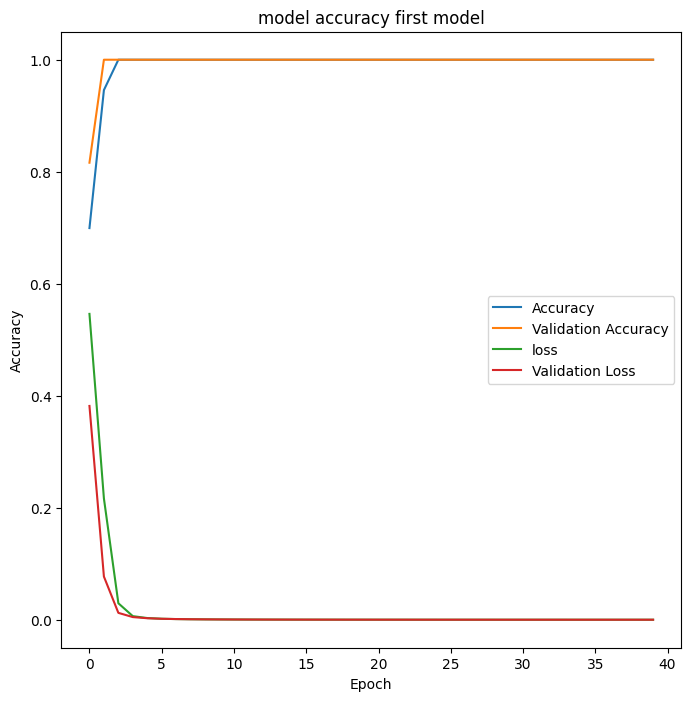

In [2]:
from __future__ import print_function

import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import RMSprop
from keras.optimizers import Adam


##### Build the model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(28,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(2, activation='softmax'))


model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer="Adam", metrics=['accuracy'])

#define a small chunk for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

history = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=40,
                    verbose=1,
                    validation_data=(X_val, y_val) ## one could have used validation_split parameter instead of manually splitting.
                    )

print("=== ***************** ===")
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

import matplotlib.pyplot as plt


def plot_accuracy(history, descr):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  plt.figure(figsize=(8, 8))
  plt.plot(acc)
  plt.plot(val_acc)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title("model accuracy "+descr)
  plt.ylabel("Accuracy")
  plt.xlabel("Epoch")
  plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
  plt.show()

plot_accuracy(history, "first model")

## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

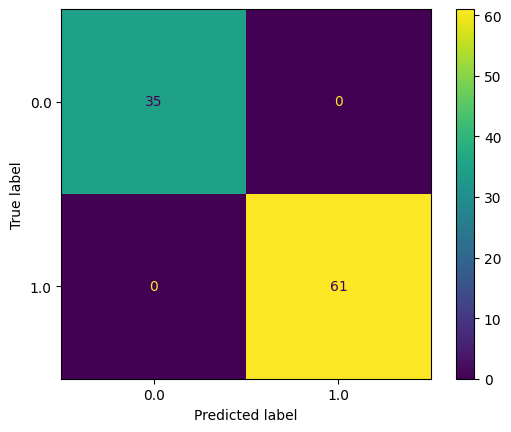

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        35
         1.0      1.000     1.000     1.000        61

    accuracy                          1.000        96
   macro avg      1.000     1.000     1.000        96
weighted avg      1.000     1.000     1.000        96

accuracy 1.0
recall 1.0
precision 1.0


In [3]:
# your code here
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test, verbose=0).argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred, digits=3))


from sklearn.metrics import accuracy_score, recall_score, precision_score

print('accuracy', accuracy_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))

## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 128)            │         3,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,626 (197.76 KB)

 Trainable params: 50,626 (197.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5558 - loss: 0.6676 - val_accuracy: 0.6782 - val_loss: 0.4136
Epoch 2/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8766 - loss: 0.2537 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 3/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9941 - loss: 0.0189 - val_accuracy: 1.0000 - val_loss: 4.0936e-04
Epoch 4/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 3.9043e-04 - val_accuracy: 1.0000 - val_loss: 2.1473e-04
Epoch 5/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 1.7313e-04 - val_accuracy: 1.0000 - val_loss: 1.2632e-04
Epoch 6/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 1.2225e-04 - val_accuracy: 1.0000 - val_loss: 8.8286e-05
Epoch 7/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 8.8108e-05 - val_accuracy: 1.0000 - val_loss: 6.6648e-05
Epoch 8/15
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 6.29

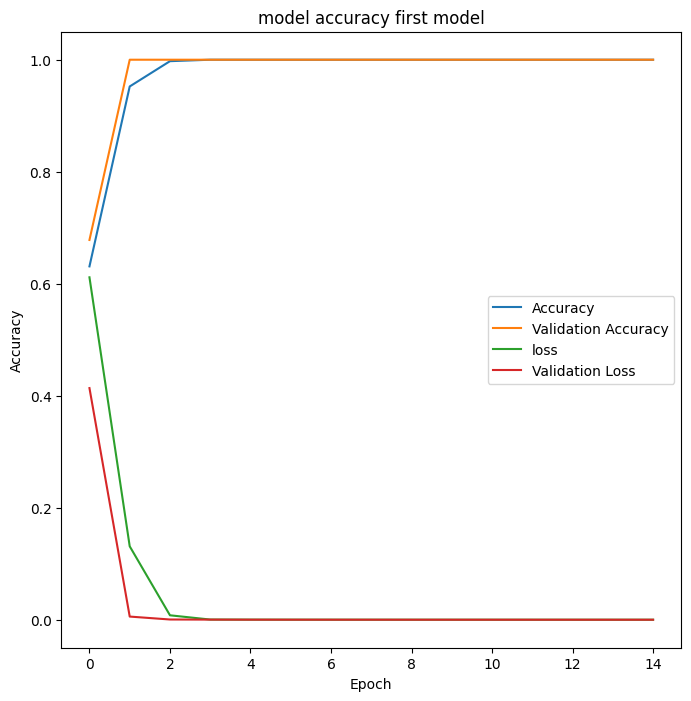

In [4]:
# your code here#
# your code here
##### Build the model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(28,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.summary()

optmz = tensorflow.keras.optimizers.Adam(learning_rate=0.0005, epsilon=1e-07)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optmz, metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    batch_size=16,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_val, y_val)
                    )

print("=== ***************** ===")
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plot_accuracy(history, "first model")


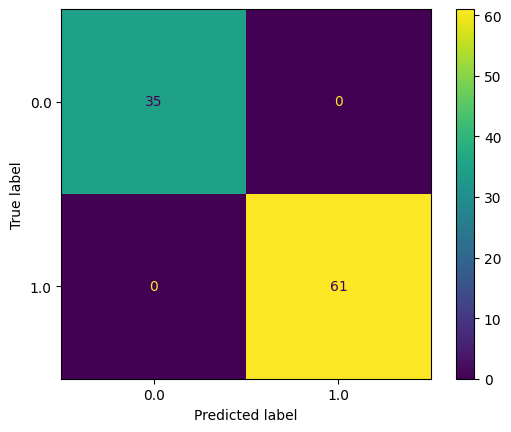

              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        35
         1.0      1.000     1.000     1.000        61

    accuracy                          1.000        96
   macro avg      1.000     1.000     1.000        96
weighted avg      1.000     1.000     1.000        96

accuracy 1.0
recall 1.0
precision 1.0


In [5]:
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

y_pred = model.predict(X_test, verbose=0).argmax(axis=1)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()
print(classification_report(y_test, y_pred, digits=3))


print('accuracy', accuracy_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('precision', precision_score(y_test, y_pred))

**Which approach(es) did you find helpful to improve your model performance?**

Cross validation is crucial, one hot encoding clearly is a game changing factor